# Clustering

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
features = pd.read_csv("10-000Songs.csv")
features = features.drop_duplicates()
features


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.516,0.595,-4.630,0.0313,0.02750,0.000000,0.109,0.222,119.972,5Ohxk2dO5COHF1krpoPigN,340707
1,0.694,0.712,-3.923,0.0460,0.13200,0.000000,0.211,0.799,98.023,1rIKgCH4H52lrvDcz50hS8,201122
2,0.603,0.670,-3.882,0.0249,0.00408,0.000002,0.112,0.446,107.993,7j4OmvkjRz0PrjFADlHfQx,242974
3,0.647,0.585,-6.123,0.0512,0.00314,0.000000,0.165,0.353,131.934,4jbmgIyjGoXjY01XxatOx6,215672
4,0.650,0.736,-5.840,0.2290,0.05130,0.000000,0.235,0.612,159.174,44ONERBHALxftQNWq6dmyd,226160
...,...,...,...,...,...,...,...,...,...,...,...
995,0.529,0.845,-8.142,0.4040,0.24400,0.000000,0.143,0.331,85.630,5Gt9bxniM1SxN61yRzRhXL,255378
996,0.701,0.650,-6.313,0.1040,0.29100,0.000000,0.112,0.647,90.003,0ada5XsQGLPUVbmTCkAP49,160212
997,0.929,0.700,-5.595,0.0906,0.14400,0.000000,0.349,0.802,120.009,4xqIYGwwZTEem9U8A42SPF,132024
998,0.774,0.554,-7.909,0.0383,0.20700,0.000000,0.132,0.349,99.034,22LAwLoDA5b4AaGSkg6bKW,162547


#### Scaling numerical features

In [3]:
features.describe()
# The scale of tempo is much bigger than the scale of many other variables
# K-Means is a distance based algorithm: we need to scale / normalize first before using it

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.691907,0.683208,-5.987470,0.139371,0.163610,0.010988,0.181043,0.541621,121.949468,208256.077000
std,0.139798,0.161163,2.422506,0.117072,0.197517,0.076189,0.136340,0.221327,29.409435,48689.033475
min,0.209000,0.121000,-17.341000,0.023200,0.000007,0.000000,0.023500,0.038500,61.311000,83200.000000
25%,0.607750,0.582000,-7.273000,0.046900,0.020600,0.000000,0.094125,0.383750,97.044000,174111.000000
50%,0.706000,0.698000,-5.538500,0.088950,0.084800,0.000000,0.129000,0.553000,119.955500,204653.500000
75%,0.793000,0.796250,-4.277000,0.216000,0.239500,0.000026,0.227500,0.714000,140.080750,235587.750000
max,0.963000,0.996000,-1.135000,0.741000,0.913000,0.949000,0.920000,0.973000,203.853000,471660.000000


In [ ]:
input_song = pd.DataFrame([features]
    input_song_numerical = input_song.select_dtypes(np.number)
    input_song_numerical_scaled = scaler.transform(input_song_numerical)
    song_transformed_df = pd.DataFrame(input_song_numerical_scaled, columns = input_song_numerical.columns)
    input_song_cluster = kmeans.predict(song_transformed_df)[0]
    rec_song = X[X["cluster"] == song_cluster].sample()
    rec_song_id = rec_song["id"]                          
    return audio_features


In [5]:
# only doing standardization on numerical values, can't be done on string type id
features_num = features.select_dtypes(np.number)
features_num
features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.516,0.595,-4.630,0.0313,0.02750,0.000000,0.109,0.222,119.972,5Ohxk2dO5COHF1krpoPigN,340707
1,0.694,0.712,-3.923,0.0460,0.13200,0.000000,0.211,0.799,98.023,1rIKgCH4H52lrvDcz50hS8,201122
2,0.603,0.670,-3.882,0.0249,0.00408,0.000002,0.112,0.446,107.993,7j4OmvkjRz0PrjFADlHfQx,242974
3,0.647,0.585,-6.123,0.0512,0.00314,0.000000,0.165,0.353,131.934,4jbmgIyjGoXjY01XxatOx6,215672
4,0.650,0.736,-5.840,0.2290,0.05130,0.000000,0.235,0.612,159.174,44ONERBHALxftQNWq6dmyd,226160
...,...,...,...,...,...,...,...,...,...,...,...
995,0.529,0.845,-8.142,0.4040,0.24400,0.000000,0.143,0.331,85.630,5Gt9bxniM1SxN61yRzRhXL,255378
996,0.701,0.650,-6.313,0.1040,0.29100,0.000000,0.112,0.647,90.003,0ada5XsQGLPUVbmTCkAP49,160212
997,0.929,0.700,-5.595,0.0906,0.14400,0.000000,0.349,0.802,120.009,4xqIYGwwZTEem9U8A42SPF,132024
998,0.774,0.554,-7.909,0.0383,0.20700,0.000000,0.132,0.349,99.034,22LAwLoDA5b4AaGSkg6bKW,162547


In [6]:
# scales each column individually
scaler = StandardScaler()
scaler.fit(features_num)
features_scaled = scaler.transform(features_num)
features_scaled_df = pd.DataFrame(features_scaled, columns=features_num.columns)
features_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-1.258922,-0.547596,0.560638,-0.923578,-0.689447,-0.144291,-0.528673,-1.444834,-0.067273,2.721705
1,0.014979,0.178741,0.852631,-0.797951,-0.160115,-0.144291,0.219831,1.163469,-0.813971,-0.146597
2,-0.636285,-0.081995,0.869564,-0.978273,-0.808079,-0.144269,-0.506658,-0.432252,-0.474795,0.713411
3,-0.321388,-0.609676,-0.055974,-0.753512,-0.812840,-0.144291,-0.117729,-0.852654,0.339671,0.152388
4,-0.299918,0.327733,0.060905,0.765974,-0.568891,-0.144291,0.395950,0.318144,1.266368,0.367904
...,...,...,...,...,...,...,...,...,...,...
995,-1.165884,1.004407,-0.889826,2.261530,0.407208,-0.144291,-0.279171,-0.952104,-1.235578,0.968298
996,0.065076,-0.206156,-0.134445,-0.302281,0.645281,-0.144291,-0.506658,0.476360,-1.086809,-0.987247
997,1.696815,0.104245,0.162091,-0.416798,-0.099330,-0.144291,1.232513,1.177030,-0.066014,-1.566476
998,0.587519,-0.802125,-0.793596,-0.863756,0.219789,-0.144291,-0.359892,-0.870736,-0.779578,-0.939266


#### Clustering the audio features with K-Means

We will pick manually the number of clusters we want - let's set it to 3. Later we will discuss how many clusters should we have.
When randomness is involved (remember, K-means picks randomly the initial centroids), we better use a random seed so that we can reproduce our results. We can set this directly to the argument random_state.

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled_df)

KMeans(n_clusters=3, random_state=42)

In [8]:
kmeans.labels_

array([0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0,
       2, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1,
       0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 2,
       1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,

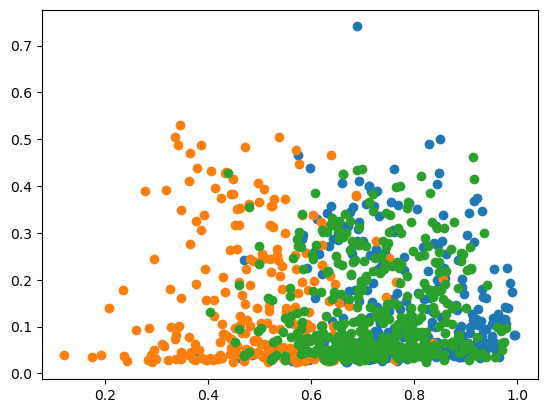

In [10]:
# assign a cluster to each example
labels = kmeans.predict(features_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(features.to_numpy()[row_ix, 1], features.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [11]:
clusters = kmeans.predict(features_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    325
1    249
2    426
dtype: int64

In [16]:
#X_df = pd.DataFrame(X)
features_num["cluster"] = clusters
features_num
# putting track_id back into result df, that will be exported
features = pd.concat([features_num, features["id"]], axis=1)
features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
0,0.516,0.595,-4.630,0.0313,0.02750,0.000000,0.109,0.222,119.972,340707,0,5Ohxk2dO5COHF1krpoPigN
1,0.694,0.712,-3.923,0.0460,0.13200,0.000000,0.211,0.799,98.023,201122,2,1rIKgCH4H52lrvDcz50hS8
2,0.603,0.670,-3.882,0.0249,0.00408,0.000002,0.112,0.446,107.993,242974,0,7j4OmvkjRz0PrjFADlHfQx
3,0.647,0.585,-6.123,0.0512,0.00314,0.000000,0.165,0.353,131.934,215672,0,4jbmgIyjGoXjY01XxatOx6
4,0.650,0.736,-5.840,0.2290,0.05130,0.000000,0.235,0.612,159.174,226160,0,44ONERBHALxftQNWq6dmyd
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.529,0.845,-8.142,0.4040,0.24400,0.000000,0.143,0.331,85.630,255378,0,5Gt9bxniM1SxN61yRzRhXL
996,0.701,0.650,-6.313,0.1040,0.29100,0.000000,0.112,0.647,90.003,160212,2,0ada5XsQGLPUVbmTCkAP49
997,0.929,0.700,-5.595,0.0906,0.14400,0.000000,0.349,0.802,120.009,132024,2,4xqIYGwwZTEem9U8A42SPF
998,0.774,0.554,-7.909,0.0383,0.20700,0.000000,0.132,0.349,99.034,162547,1,22LAwLoDA5b4AaGSkg6bKW


In [17]:
features[features['cluster'] == 0].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
63,0.648,0.738,-5.883,0.247,0.0408,0.0,0.292,0.603,159.145,226160,0,4pLwZjInHj3SimIyN9SnOz


In [18]:
kmeans.inertia_

7831.466808654577

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

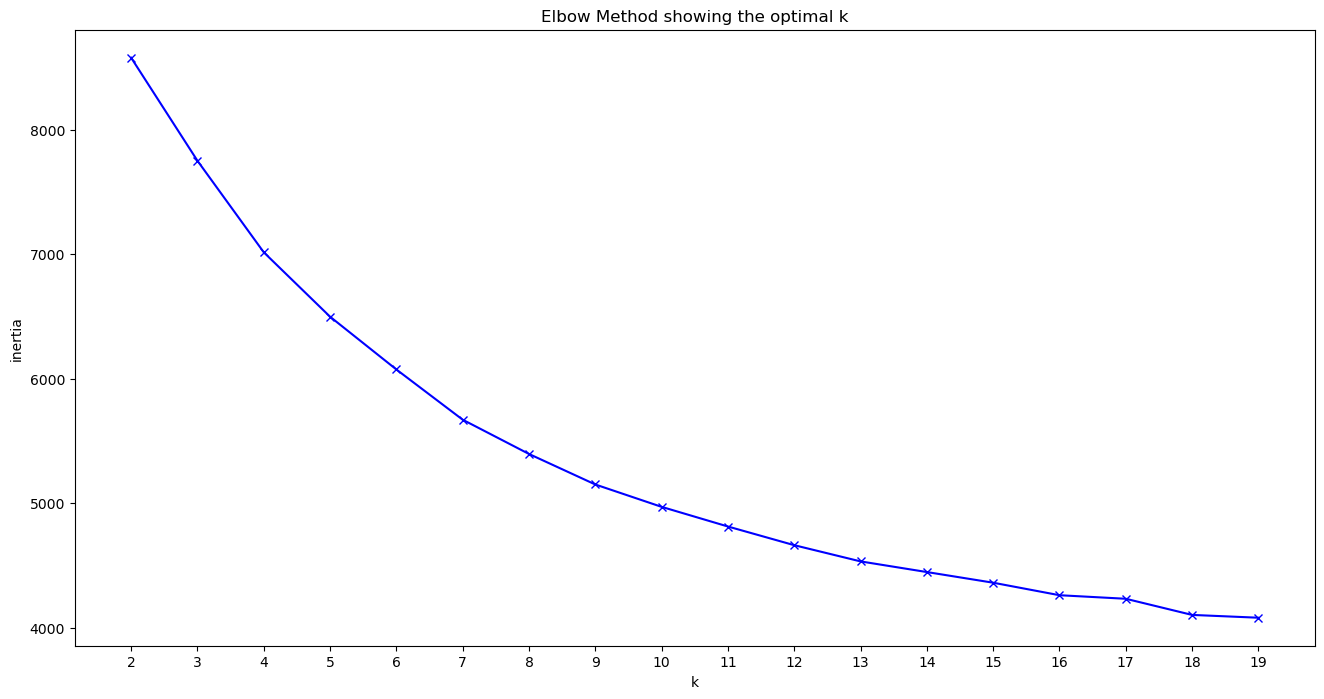

In [19]:
K = range(2, 20) # from 2 to 20 clusters
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(features_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [20]:
# k = 4 is where elbow is

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

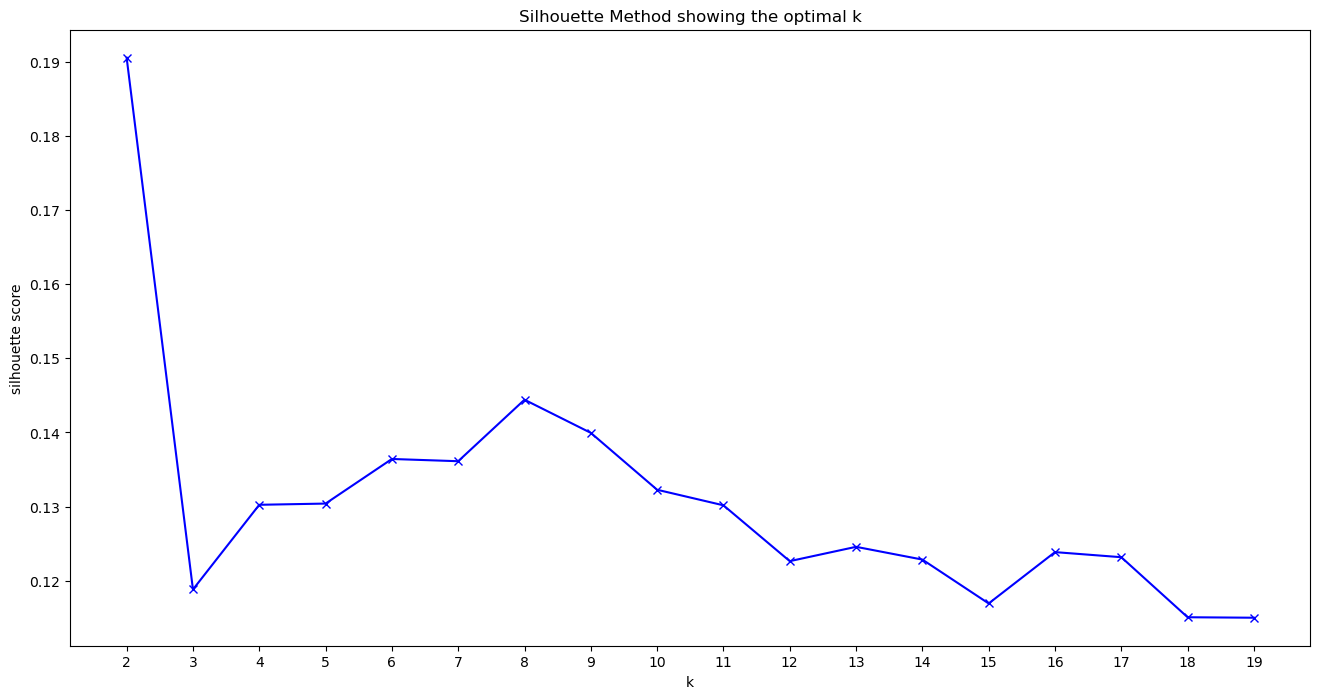

In [21]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(features_scaled_df)
    silhouette.append(silhouette_score(features_scaled_df, kmeans.predict(features_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [22]:
# k = 2 oder k = 8 or k = 13, k = 16 seems good
# because this is everytime graph goes up and stops at highest point

In [23]:
#Rerun with k=8
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(features_scaled_df)

KMeans(random_state=42)

In [24]:
kmeans.labels_

array([0, 1, 0, 0, 6, 1, 0, 1, 1, 3, 0, 3, 1, 1, 5, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 4, 1, 1, 3, 4, 1, 4, 0, 1, 0, 1, 3, 0, 0, 0, 1, 4, 4, 1, 0,
       1, 5, 1, 0, 0, 0, 0, 4, 4, 1, 1, 3, 4, 1, 3, 0, 1, 4, 0, 6, 1, 5,
       4, 1, 4, 0, 0, 0, 4, 1, 4, 0, 1, 1, 1, 0, 0, 0, 6, 6, 0, 1, 0, 1,
       1, 0, 7, 4, 1, 5, 6, 1, 4, 1, 1, 0, 6, 0, 0, 2, 4, 5, 3, 3, 0, 1,
       1, 0, 1, 2, 1, 1, 5, 0, 0, 4, 6, 1, 1, 2, 0, 3, 0, 1, 0, 0, 0, 4,
       1, 3, 6, 0, 0, 2, 0, 0, 1, 5, 4, 0, 6, 5, 1, 1, 5, 4, 1, 1, 5, 3,
       0, 5, 1, 0, 4, 4, 3, 1, 5, 5, 0, 4, 1, 6, 0, 4, 4, 0, 5, 7, 1, 5,
       4, 0, 0, 5, 5, 0, 2, 5, 1, 6, 1, 1, 4, 4, 1, 2, 4, 5, 5, 4, 5, 6,
       0, 0, 5, 4, 4, 5, 5, 1, 4, 0, 5, 4, 1, 0, 6, 5, 5, 5, 1, 0, 5, 5,
       0, 4, 6, 0, 5, 4, 0, 0, 0, 0, 2, 0, 0, 5, 0, 1, 1, 0, 4, 1, 5, 1,
       5, 5, 5, 0, 0, 4, 0, 0, 2, 0, 5, 1, 1, 0, 5, 2, 0, 4, 7, 0, 0, 0,
       0, 4, 0, 0, 4, 4, 2, 1, 0, 5, 1, 2, 2, 2, 0, 0, 5, 0, 2, 6, 3, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 6, 1, 1, 1, 2, 6, 1,

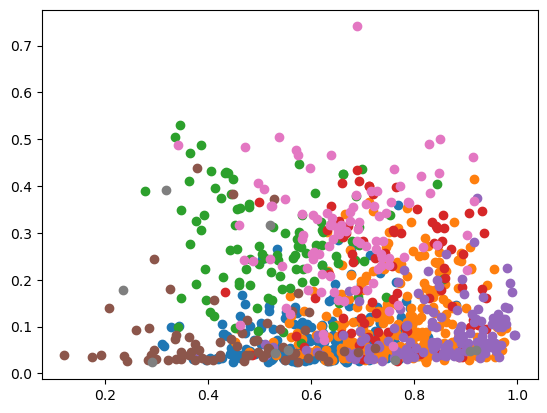

In [25]:
# assign a cluster to each example
labels = kmeans.predict(features_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(features.to_numpy()[row_ix, 1], features.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [26]:
clusters = kmeans.predict(features_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    213
1    291
2     99
3     85
4    136
5     69
6     98
7      9
dtype: int64

In [27]:
#X_df = pd.DataFrame(X)
features["cluster"] = clusters
features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
0,0.516,0.595,-4.630,0.0313,0.02750,0.000000,0.109,0.222,119.972,340707,0,5Ohxk2dO5COHF1krpoPigN
1,0.694,0.712,-3.923,0.0460,0.13200,0.000000,0.211,0.799,98.023,201122,1,1rIKgCH4H52lrvDcz50hS8
2,0.603,0.670,-3.882,0.0249,0.00408,0.000002,0.112,0.446,107.993,242974,0,7j4OmvkjRz0PrjFADlHfQx
3,0.647,0.585,-6.123,0.0512,0.00314,0.000000,0.165,0.353,131.934,215672,0,4jbmgIyjGoXjY01XxatOx6
4,0.650,0.736,-5.840,0.2290,0.05130,0.000000,0.235,0.612,159.174,226160,6,44ONERBHALxftQNWq6dmyd
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.529,0.845,-8.142,0.4040,0.24400,0.000000,0.143,0.331,85.630,255378,2,5Gt9bxniM1SxN61yRzRhXL
996,0.701,0.650,-6.313,0.1040,0.29100,0.000000,0.112,0.647,90.003,160212,1,0ada5XsQGLPUVbmTCkAP49
997,0.929,0.700,-5.595,0.0906,0.14400,0.000000,0.349,0.802,120.009,132024,1,4xqIYGwwZTEem9U8A42SPF
998,0.774,0.554,-7.909,0.0383,0.20700,0.000000,0.132,0.349,99.034,162547,0,22LAwLoDA5b4AaGSkg6bKW


In [28]:
kmeans

KMeans(random_state=42)

In [29]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)


In [31]:

with open("kmeans_8.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [32]:
kmeans

KMeans(random_state=42)

In [33]:
features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
0,0.516,0.595,-4.630,0.0313,0.02750,0.000000,0.109,0.222,119.972,340707,0,5Ohxk2dO5COHF1krpoPigN
1,0.694,0.712,-3.923,0.0460,0.13200,0.000000,0.211,0.799,98.023,201122,1,1rIKgCH4H52lrvDcz50hS8
2,0.603,0.670,-3.882,0.0249,0.00408,0.000002,0.112,0.446,107.993,242974,0,7j4OmvkjRz0PrjFADlHfQx
3,0.647,0.585,-6.123,0.0512,0.00314,0.000000,0.165,0.353,131.934,215672,0,4jbmgIyjGoXjY01XxatOx6
4,0.650,0.736,-5.840,0.2290,0.05130,0.000000,0.235,0.612,159.174,226160,6,44ONERBHALxftQNWq6dmyd
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.529,0.845,-8.142,0.4040,0.24400,0.000000,0.143,0.331,85.630,255378,2,5Gt9bxniM1SxN61yRzRhXL
996,0.701,0.650,-6.313,0.1040,0.29100,0.000000,0.112,0.647,90.003,160212,1,0ada5XsQGLPUVbmTCkAP49
997,0.929,0.700,-5.595,0.0906,0.14400,0.000000,0.349,0.802,120.009,132024,1,4xqIYGwwZTEem9U8A42SPF
998,0.774,0.554,-7.909,0.0383,0.20700,0.000000,0.132,0.349,99.034,162547,0,22LAwLoDA5b4AaGSkg6bKW


In [34]:
features.to_csv("audio-features.csv",index=False)